<p align="center"><img src="https://lp.eloscience.com/wp-content/uploads/2021/01/data-hands.png" width="60%"></p>

#**Importância do teste A / B em Python**
Usando Python para determinar o quão confiantes estamos em nossos resultados de teste A / B

---


#1.0 - O que é um teste AB?
Imagine que você está encarregado de um site para otimizar as vendas. Você tem a versão atual do site, mas não está satisfeito com ela. O botão “Comprar” não é óbvio para o usuário, está escondido, então você deve tentar torná-lo maior e mais brilhante, talvez isso aumente a conversão. Mas você também se preocupa com o rigor estatístico. Assim, você configura seu site de forma que metade das pessoas seja direcionada ao site antigo e a outra metade para aquele onde você fez a alteração. Você tem dados de ambos e deseja saber, com segurança, "A alteração que fiz aumentou a conversão?" .

<br>
<br>
<p align="center"><img src="https://lp.eloscience.com/wp-content/uploads/2021/01/Sem-título-3.png" width="50%"></p>

<br>
<br>

Este é um teste A / B. Freqüentemente, isso é usado de forma intercambiável com o termo “teste de divisão”, embora em geral os testes A / B testem pequenas mudanças, e o teste de divisão pode ser quando você apresenta dois sites totalmente diferentes para o usuário.



##1.1 - Por que não mudar o site e monitorá-lo por uma semana? 
Boa pergunta - tendo dois sites ativos ao mesmo tempo e direcionando usuários aleatoriamente para um ou outro, você controla todas as outras variáveis. Se uma semana depois o colocar na semana anterior ao Natal, isso afetará as vendas e você poderá tirar uma conclusão errada por causa desses efeitos confusos.

##1.2 - Por que não é um teste A / B / C?
Bem, você pode ter quantas variações quiser, mas deve manter o nome simples. Porém, quanto mais variações você tentar, menor será o número de amostras que você terá para cada caso e mais difícil será tirar conclusões estatisticamente significativas.

Agora, os testes A / B podem testar o que você quiser, mas os mais comuns são cliques / conversão, taxa de rejeição e quanto tempo você passa na página. Para este exemplo, vamos supor que queremos otimizar a conversão, que em nosso caso é clicar no botão “Comprar” acima.

Suponhamos que você tenha **1.000** usuários, **550** foram direcionados para o site **A**, **450** para o site **B**. No site **A**, **48** usuários foram convertidos. No site **B**, **56** usuários converteram. **Este é um resultado estatisticamente significativo?**

In [ ]:
num_a, num_b = 550, 450
click_a, click_b = 48, 56
rate_a, rate_b = click_a / num_a, click_b / num_b

In [ ]:
rate_a * 100, rate_b * 100

(8.727272727272728, 12.444444444444445)

#2.0 - Modelagem de clique
Você pode clicar em um botão ou não. Duas opções discretas estão disponíveis, portanto, esta é uma distribuição binomial de livro didático, com alguma taxa desconhecida para o site A e o site B. Não sabemos a taxa de cliques real, mas podemos estimá-la usando nossa pequena amostra.



In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

Agora, precisamos determinar a probabilidade de ter x número de cliques.

In [ ]:
clicks = np.arange(20, 80)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

Após a criação de uma matriz uniforme e de calcular a probalidade usando a função `.pmf()`, vamos criar um gráfico para mostrar essa distribuição.

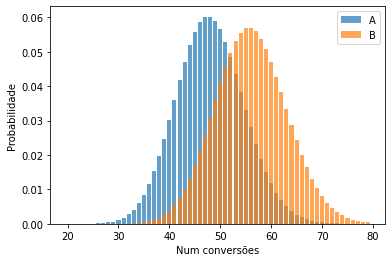

In [ ]:
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("Num conversões"); plt.ylabel("Probabilidade");

Portanto, podemos ver aqui que b tem uma diferença, mas é certamente possível se escolhermos dois pontos aleatórios de acordo com os histogramas de A e B, que A pode realmente ser maior do que B!

# 3.0 - Usando Distribuição Normal
Nós podemos trabalhar com distribuições de Poisson no caso de querermos saber “Quanto tempo você ficou no site?”. Poderíamos trocar para cada questão... ou podemos invocar o Teorema do Limite Central. Como estamos interessados ​​na conversão média , ou tempo médio gasto no site, essa média de uma distribuição subjacente significa que nossa estimativa final será bem aproximada por uma distribuição normal.

Então, vamos reformular, [usando a aproximação normal aqui](https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation):

In [ ]:
from scipy.stats import norm

#De onde isto vem? Veja o link acima.
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

In [ ]:
click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

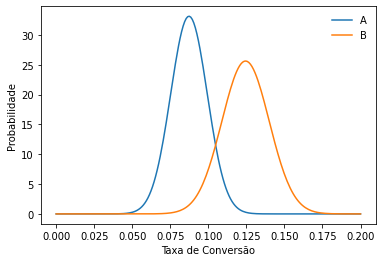

In [ ]:
#Fazemos o Gráfico de Barras.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Taxa de Conversão"); plt.ylabel("Probabilidade");

Este também é um gráfico melhor do que o primeiro, porque removemos o efeito confuso de o site A e o site B terem um número ligeiramente diferente de visitantes. Portanto, nossa pergunta ainda é a mesma: Qual é a chance de um empate de B ser maior do que um empate de A. **Isso é significativo?**

Para responder a isso, vamos utilizar o fato prático de que a soma (ou diferença) de números aleatórios normalmente distribuídos também é normal. [Veja aqui a prova](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables), mas a matemática é a seguinte:

<br>
<br>
<p align="center"><img src="https://lp.eloscience.com/wp-content/uploads/2021/01/Screen-Shot-2021-01-05-at-15.45.16.png" width="50%"></p>

<br>
<br>


Isso é simples - pegue a diferença nas médias e some a variância. Faremos duas coisas a seguir: primeiro, obtenha a pontuação z e, em segundo lugar, trace a distribuição adequada.

zscore is 1.890, with p-value 0.029


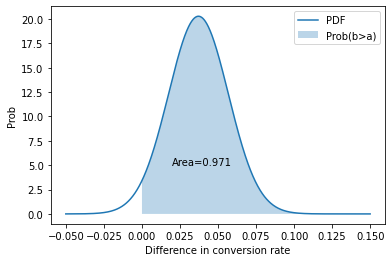

In [ ]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Diferença na taxa de conversão"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

Ótimo! Então, como expressar esse resultado? Usando nossa abordagem frequentista até agora, diríamos que, dada a hipótese nula ser verdadeira (que B é menor ou igual a A), esperaríamos obter esse resultado ou um resultado mais extremo apenas 2,9% das vezes. Como esse é um resultado significativo (normalmente p <5%), rejeitamos a hipótese nula e afirmamos que temos evidências de que B > A.

Devemos observar explicitamente aqui que este é um teste unilateral - a pergunta que fizemos é se B > A. Uma alternativa é o teste bilateral, em que apenas queremos discriminar que B é diferente de A. Nesse caso, nosso valor p é realmente 2 × 2,9 = 5,8 por cento (já que temos duas caudas, não uma), e desejaríamos mais amostras antes de rejeitar a hipótese nula se nos limitarmos ao valor p de 0,05.

No entanto, fizemos muitos gráficos para tentar explicar o conceito. Você pode facilmente escrever uma pequena função para simplificar tudo isso. Se você deseja a confiança ou o valor p, significa apenas alterar o final `norm.cdf` para `norm.sf`.

In [ ]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.cdf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

0.9705973498275782


#4.0 - Verificando se está correto
E daí se não tivermos certeza de que fizemos as contas perfeitamente? Existe uma maneira de usarmos a força bruta para um cheque? Acontece que existe, mas não desde o início. Podemos começar em nossa aproximação normal e partir daí.

In [ ]:
# 10.000 amostras de taxas possíveis para a e b
n = 10000
rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)
b_better = (rates_b > rates_a).sum() / n
print(f"B é melhor que A {b_better * 100:0.1f}% das vezes")

B é melhor que A 97.2% das vezes


O que, reformulado para a linguagem anterior, é que A> B apenas 2,8% das vezes, o que é estatisticamente significativo de modo que podemos rejeitar nossa hipótese (que A <= B).

Freqüentemente, é assim que faríamos análises mais complicadas, quando não há uma solução analítica. O poder da computação moderna abre muitas portas!

#5.0 - Realizando os testes ainda mais rápido?
Nós mesmos fizemos algumas contas, reduzindo as coisas a uma distribuição normal e fazendo um teste básico de diferença de médias. Mas `scipy` tem muitas coisas escondidas dentro dele para tornar nossas vidas mais fáceis. Aqui, imagine que temos os resultados brutos do click through, 0 ou 1, como nossa distribuição, e queremos usar um teste t embutido.

##5.1 - Teste t de Welsch

In [ ]:
from scipy.stats import ttest_ind

a_dist = np.zeros(num_a)
a_dist[:click_a] = 1
b_dist = np.zeros(num_b)
b_dist[:click_b] = 1
zscore, prob = ttest_ind(a_dist, b_dist, equal_var=False)
print(f"Zscore é {zscore:0.2f}, p-value é {prob:0.3f} (bilateral), {prob/2:0.3f} (unilateral)")

Zscore é -1.89, p-value é 0.059 (bilateral), 0.030 (unilateral)


Observe aqui que o valor p por padrão está usando o teste bilateral. Podemos ver que esses valores são quase idênticos aos que calculamos... mas não são exatamente iguais. Por que é isso? Bem, o ttest_ind (com equal_var=False) está executando o teste t de Welsch. O teste t tem graus de liberdade que irão induzir diferenças sutis com a aproximação normal. Além disso, o teste t de Welsch é destinado a dados contínuos, temos opções discretas 0 e 1. Uma opção melhor para dados discretos é a estatística U de Mann-Whitney.

##5.2 - Teste U de Mann-Whitney

In [ ]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U teste para hipótese nula B <= A é {p_value:0.3f}")

Mann-Whitney U teste para hipótese nula B <= A é 0.028


Portanto, você pode ver que nosso valor de p é baixo e podemos rejeitar a hipótese nula. Notamos também que temos `alternative="less"`, que é a hipótese nula que estamos testando para que possamos investigar se B > A.

Mais uma vez, podemos ver uma resposta super semelhante ao que recebemos antes. Para os casos em que temos centenas de pontos de dados, essas respostas convergem rapidamente e você pode escolher o sabor que desejar.